# Importing libraries:

In [69]:
import numpy as np 
import pandas as pd

# Importing Data from CSV:

In [70]:
car_df=pd.read_csv(r'C:\Users\saurabh.upman\Desktop\Modified_Car_Price.csv')

In [71]:
car_df.head(5)

,Unnamed: 0,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,3,?,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,4,2,164,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Drop extra unnamed column:

In [72]:
car_df.drop(car_df.columns[car_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# check if it is dropped:

In [73]:
car_df.head(5)

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [74]:
car_df.shape

(205, 26)

# summary of statistics[Mean,SD..] for imputing purpose:

In [75]:
car_df.describe()

,symboling,Wheel_Base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [76]:
car_df.Manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Imputing character-'?' in the dataset:

In [77]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
Fuel_Type            205 non-null object
Aspiration           205 non-null object
No_of_Doors          205 non-null object
Body_Style           205 non-null object
Drive_Wheels         205 non-null object
Engine_Location      205 non-null object
Wheel_Base           205 non-null float64
Manufacturer         205 non-null object
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [78]:
car_df['normalized_losses']=np.where(car_df['normalized_losses']=='?','',car_df['normalized_losses'])

In [79]:
car_df

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,,gas,std,two,sedan,fwd,front,99.8,audi,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,gas,std,four,sedan,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,,gas,std,four,wagon,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,gas,turbo,four,sedan,fwd,front,105.8,audi,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,,gas,turbo,two,hatchback,4wd,front,99.5,audi,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


In [80]:
car_df['price']=np.where(car_df['price']=='?','',car_df['price'])

In [81]:
car_df['peak_rpm']=np.where(car_df['peak_rpm']=='?','',car_df['peak_rpm']) 

In [82]:
car_df['horsepower']=np.where(car_df['horsepower']=='?','',car_df['horsepower']) 

In [83]:
car_df['bore']=np.where(car_df['bore']=='?','',car_df['bore']) 

In [84]:
car_df['stroke']=np.where(car_df['stroke']=='?','',car_df['stroke']) 

In [85]:
normalized_losses--int   [bore	stroke]-float  horsepower-int peak_rpm-int  
price-float




SyntaxError: invalid syntax (<ipython-input-85-6fb959612315>, line 1)

In [86]:
car_df['price']=np.where(car_df['price']=='','9999',car_df['price'])
car_df['peak_rpm']=np.where(car_df['peak_rpm']=='','9999',car_df['peak_rpm']) 
car_df['horsepower']=np.where(car_df['horsepower']=='','9999',car_df['horsepower']) 
car_df['bore']=np.where(car_df['bore']=='','9999',car_df['bore']) 
car_df['stroke']=np.where(car_df['stroke']=='','9999',car_df['stroke']) 

In [87]:
car_df['normalized_losses']=np.where(car_df['normalized_losses']=='','9999',car_df['normalized_losses'])

In [88]:
car_df

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,9999,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,9999,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,9999,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,9999,gas,std,two,sedan,fwd,front,99.8,audi,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,gas,std,four,sedan,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,9999,gas,std,four,wagon,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,gas,turbo,four,sedan,fwd,front,105.8,audi,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,9999,gas,turbo,two,hatchback,4wd,front,99.5,audi,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,9999


# Changing datatype from object to int/float for numerical columns:

In [89]:
car_df['normalized_losses']=car_df['normalized_losses'].astype('int')
car_df['bore']=car_df['bore'].astype('float')
car_df['stroke']=car_df['stroke'].astype('float')
car_df['horsepower']=car_df['horsepower'].astype('int')
car_df['peak_rpm']=car_df['peak_rpm'].astype('int')
car_df['price']=car_df['price'].astype('float')

In [90]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null int32
Fuel_Type            205 non-null object
Aspiration           205 non-null object
No_of_Doors          205 non-null object
Body_Style           205 non-null object
Drive_Wheels         205 non-null object
Engine_Location      205 non-null object
Wheel_Base           205 non-null float64
Manufacturer         205 non-null object
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
horsepower           205 non-nu

In [91]:
car_df.describe()

,symboling,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,2097.400000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,198.367220,198.294341,10.142537,200.790244,5172.917073,25.219512,30.751220,13144.531707
std,1.245307,3960.598206,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,1385.951201,1385.961516,3.972040,975.735399,676.832797,6.542142,6.886443,7881.331186
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,128.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10198.000000
75%,2.000000,186.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.600000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,9999.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,9999.000000,9999.000000,23.000000,9999.000000,9999.000000,49.000000,54.000000,45400.000000


# Impute 9999 by Mean:[Generally mean is being used]

In [92]:
car_df['normalized_losses']=np.where(car_df['normalized_losses']==9999,car_df['normalized_losses'].mean(),car_df['normalized_losses'])

In [93]:
car_df['normalized_losses']

0      2097.4
1      2097.4
2      2097.4
3       164.0
4       164.0
5      2097.4
6       158.0
7      2097.4
8       158.0
9      2097.4
10      192.0
11      192.0
12      188.0
13      188.0
14     2097.4
15     2097.4
16     2097.4
17     2097.4
18      121.0
19       98.0
20       81.0
21      118.0
22      118.0
23      118.0
24      148.0
25      148.0
26      148.0
27      148.0
28      110.0
29      145.0
        ...  
175      65.0
176      65.0
177      65.0
178     197.0
179     197.0
180      90.0
181    2097.4
182     122.0
183     122.0
184      94.0
185      94.0
186      94.0
187      94.0
188      94.0
189    2097.4
190     256.0
191    2097.4
192    2097.4
193    2097.4
194     103.0
195      74.0
196     103.0
197      74.0
198     103.0
199      74.0
200      95.0
201      95.0
202      95.0
203      95.0
204      95.0
Name: normalized_losses, Length: 205, dtype: float64

In [94]:
car_df['price']=np.where(car_df['price']==9999,car_df['price'].mean(),car_df['price'])
car_df['peak_rpm']=np.where(car_df['peak_rpm']==9999,car_df['peak_rpm'].mean(),car_df['peak_rpm']) 
car_df['horsepower']=np.where(car_df['horsepower']==9999,car_df['horsepower'].mean(),car_df['horsepower']) 
car_df['bore']=np.where(car_df['bore']==9999,car_df['bore'].mean(),car_df['bore']) 
car_df['stroke']=np.where(car_df['stroke']==9999,car_df['stroke'].mean(),car_df['stroke']) 

# DATA Visualization:

# Importing libraries :

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

C:\Users\saurabh.upman\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\saurabh.upman\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Density Of Cars By Price')

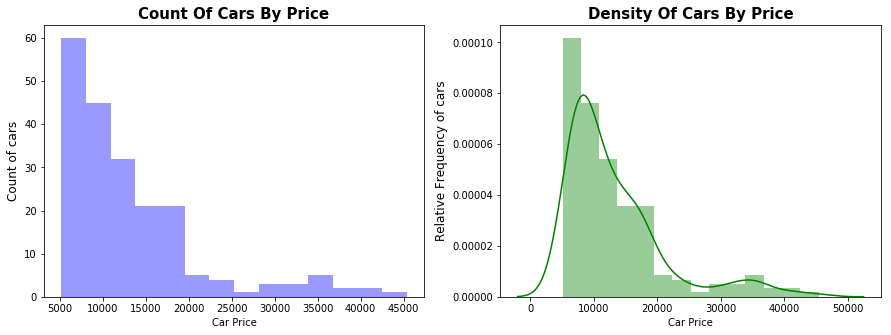

In [97]:
#Price[target variable]:
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(car_df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(car_df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density Of Cars By Price',size=15,weight="bold")

# Data Exploration:

In [98]:
#filtering numeric variables only
car_df_numeric=car_df.select_dtypes(include=['float64','int64'])
car_df_numeric.head(5)

,symboling,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,2097.4,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,2097.4,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,2097.4,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [100]:
#Dropping symboling as symboling is more of categorical variable as described before:
car_df_numeric = car_df_numeric.drop(['symboling'], axis=1)
car_df_numeric.head()

,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2097.4,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2097.4,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2097.4,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# LINEARITY CHECK

In [108]:
#Check if price has linear relation with independent variables:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
for i, col in enumerate (car_df_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=car_df_numeric[col],y=car_df_numeric['price'])

AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

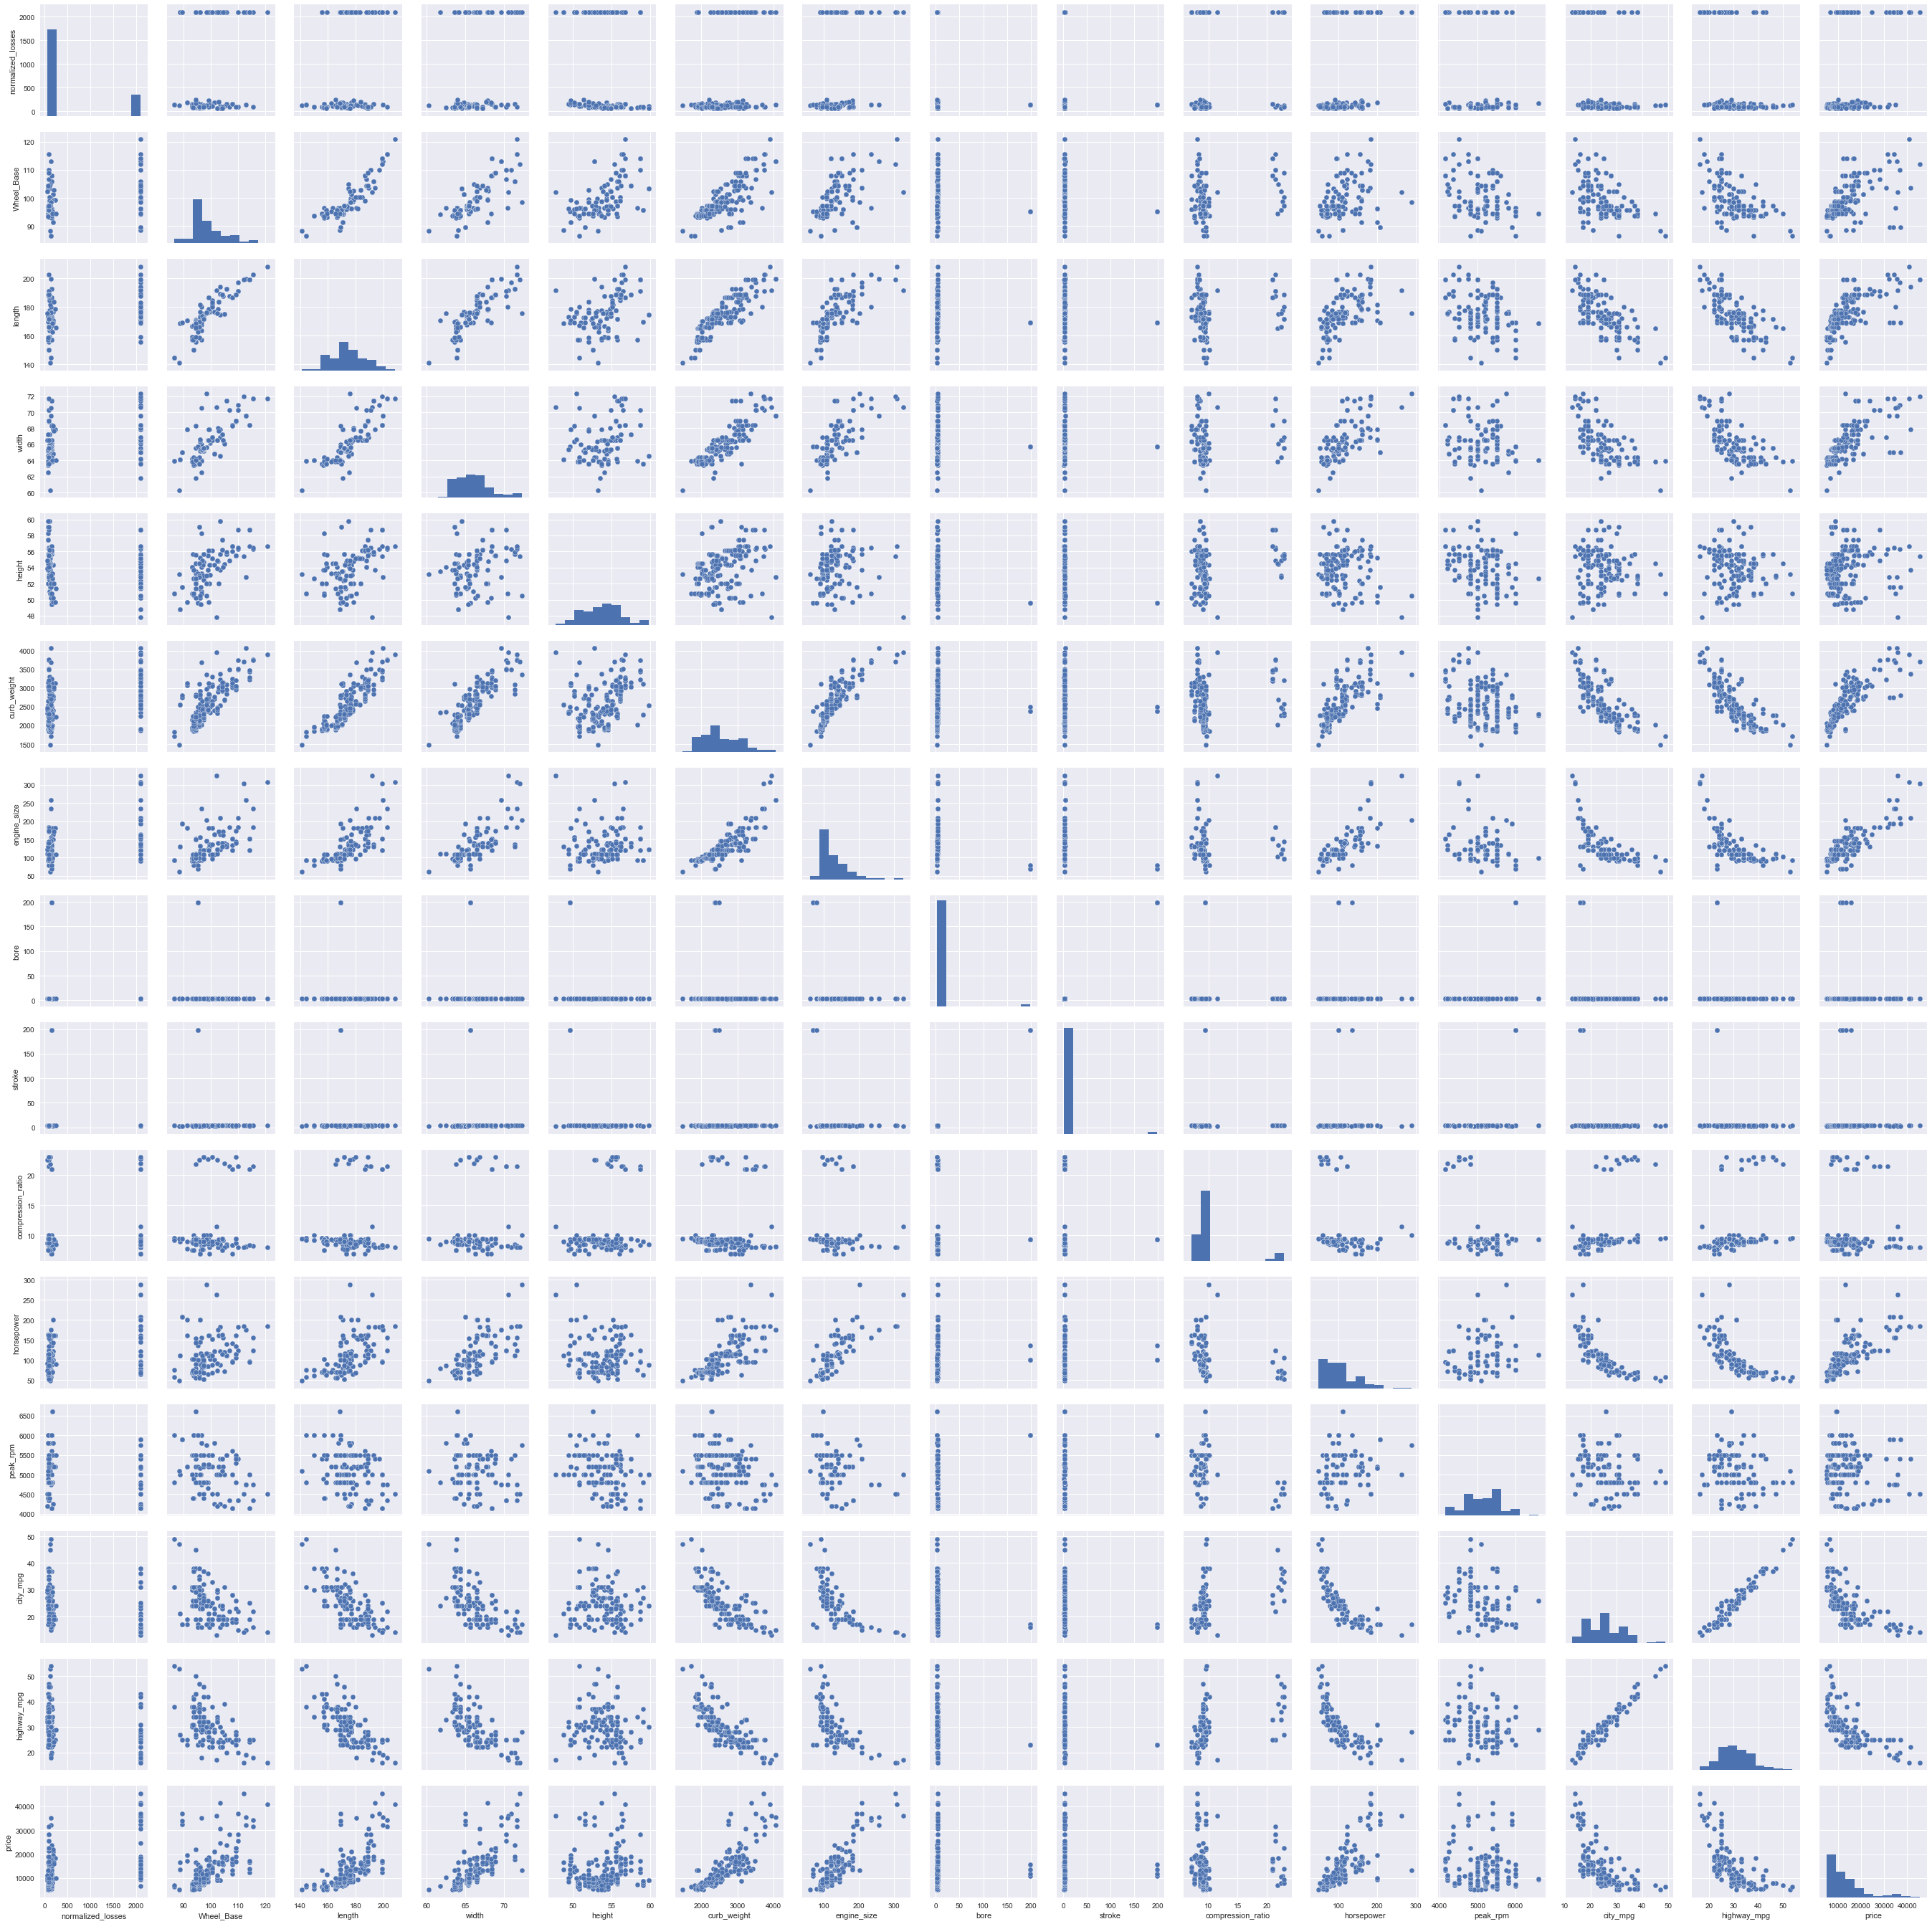

In [106]:
plt.figure(figsize=(20, 10))
sns.pairplot(car_df_numeric)

# Correlation matrix:[to check correlation of variables with target variable 'price']

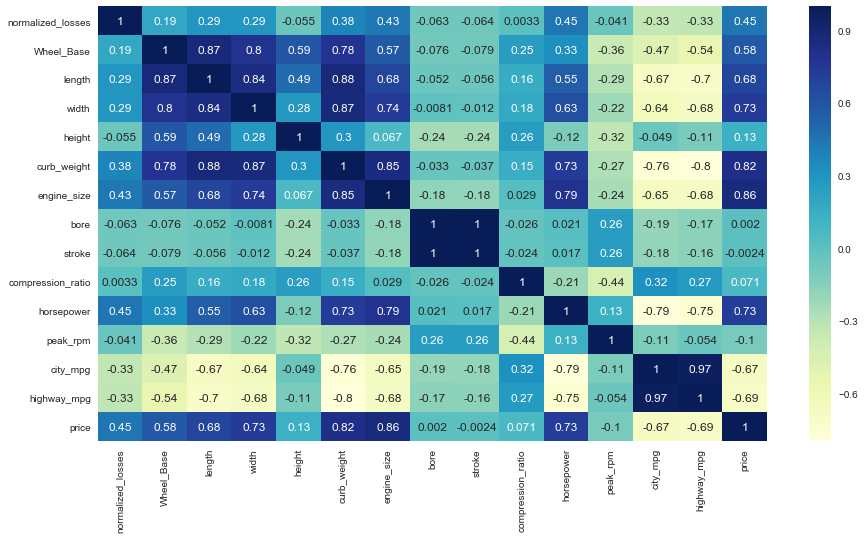

In [107]:
corr=car_df_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [109]:
#converting symboling to categorical
car_df['symboling'] = car_df['symboling'].astype('object')
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null object
normalized_losses    205 non-null float64
Fuel_Type            205 non-null object
Aspiration           205 non-null object
No_of_Doors          205 non-null object
Body_Style           205 non-null object
Drive_Wheels         205 non-null object
Engine_Location      205 non-null object
Wheel_Base           205 non-null float64
Manufacturer         205 non-null object
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
horsepower           205 non

# Data cleansing and feature engineering:

In [110]:
# Drop Manufacturer variable
car_df= car_df.drop('Manufacturer',axis=1)

# Creating two Sets X and Y:

In [111]:
X=car_df.drop(columns=['price'])
y=car_df['price']

In [113]:
# creating dummy variables for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head(5)

,symboling,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,engine_type,num_of_cylinders,fuel_system
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [114]:
#creating dummy variables
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,Fuel_Type_gas,Aspiration_turbo,No_of_Doors_four,No_of_Doors_two,Body_Style_hardtop,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
X=X.drop(columns=cars_categorical)
X.head(5)

,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,2097.4,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,2097.4,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,2097.4,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [116]:
dfX=pd.merge(X,cars_dummies,on=X.index)
dfX.columns

Index(['key_0', 'normalized_losses', 'Wheel_Base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'Fuel_Type_gas', 'Aspiration_turbo', 'No_of_Doors_four',
       'No_of_Doors_two', 'Body_Style_hardtop', 'Body_Style_hatchback',
       'Body_Style_sedan', 'Body_Style_wagon', 'Drive_Wheels_fwd',
       'Drive_Wheels_rwd', 'Engine_Location_rear', 'engine_type_dohcv',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'engine_type_rotor', 'num_of_cylinders_five',
       'num_of_cylinders_four', 'num_of_cylinders_six',
       'num_of_cylinders_three', 'num_of_cylinders_twelve',
       'num_of_cylinders_two', 'fuel_system_2bbl', 'fuel_system_4bbl',
       'fuel_system_idi', 'fuel_system_mfi', 'fuel_system_mpfi',
       'fuel_system_spdi', 'fuel_syste

In [117]:
dfX.drop(columns='key_0',inplace=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 49 columns):
normalized_losses          205 non-null float64
Wheel_Base                 205 non-null float64
length                     205 non-null float64
width                      205 non-null float64
height                     205 non-null float64
curb_weight                205 non-null int64
engine_size                205 non-null int64
bore                       205 non-null float64
stroke                     205 non-null float64
compression_ratio          205 non-null float64
horsepower                 205 non-null float64
peak_rpm                   205 non-null float64
city_mpg                   205 non-null int64
highway_mpg                205 non-null int64
symboling_-1               205 non-null uint8
symboling_0                205 non-null uint8
symboling_1                205 non-null uint8
symboling_2                205 non-null uint8
symboling_3                205 non-null uint8
F

# Feature Scaling:

In [118]:
from sklearn.preprocessing import scale

In [119]:
cols=dfX.columns
dfX_scaled=pd.DataFrame(scale(dfX))
dfX_scaled.columns=cols
dfX_scaled.columns

C:\Users\saurabh.upman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


Index(['normalized_losses', 'Wheel_Base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'Fuel_Type_gas', 'Aspiration_turbo', 'No_of_Doors_four',
       'No_of_Doors_two', 'Body_Style_hardtop', 'Body_Style_hatchback',
       'Body_Style_sedan', 'Body_Style_wagon', 'Drive_Wheels_fwd',
       'Drive_Wheels_rwd', 'Engine_Location_rear', 'engine_type_dohcv',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'engine_type_rotor', 'num_of_cylinders_five',
       'num_of_cylinders_four', 'num_of_cylinders_six',
       'num_of_cylinders_three', 'num_of_cylinders_twelve',
       'num_of_cylinders_two', 'fuel_system_2bbl', 'fuel_system_4bbl',
       'fuel_system_idi', 'fuel_system_mfi', 'fuel_system_mpfi',
       'fuel_system_spdi', 'fuel_system_spfi'],

# Check if features are scaled up:

In [120]:
dfX_scaled.describe()
#Mean is near to 0 and Std near 1--DONE

,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,1.278110e-16,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,-1.707983e-16,-1.016802e-16,-3.115394e-16,...,-7.040439e-17,-7.040439e-17,1.538065e-16,-1.191459e-17,-7.852797e-18,-3.533759e-16,-7.040439e-17,-3.271096e-16,2.873041e-16,-7.040439e-17
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-5.716802e-01,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-1.703357e-01,-1.849985e-01,-7.931011e-01,...,-7.001400e-02,-7.001400e-02,-1.410691e-01,-6.890719e-01,-1.218667e-01,-3.287980e-01,-7.001400e-02,-9.202428e-01,-2.142857e-01,-7.001400e-02
25%,-5.261562e-01,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-1.477249e-01,-1.464499e-01,-3.892993e-01,...,-7.001400e-02,-7.001400e-02,-1.410691e-01,-6.890719e-01,-1.218667e-01,-3.287980e-01,-7.001400e-02,-9.202428e-01,-2.142857e-01,-7.001400e-02
50%,-4.920132e-01,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-1.417942e-01,-1.397780e-01,-2.883489e-01,...,-7.001400e-02,-7.001400e-02,-1.410691e-01,-6.890719e-01,-1.218667e-01,-3.287980e-01,-7.001400e-02,-9.202428e-01,-2.142857e-01,-7.001400e-02
75%,-4.186690e-01,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,-1.310448e-01,-1.353301e-01,-1.873985e-01,...,-7.001400e-02,-7.001400e-02,-1.410691e-01,1.451227e+00,-1.218667e-01,-3.287980e-01,-7.001400e-02,1.086670e+00,-2.142857e-01,-7.001400e-02
max,1.998402e+00,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,7.088368e+00,7.088247e+00,3.244916e+00,...,1.428286e+01,1.428286e+01,7.088723e+00,1.451227e+00,8.205689e+00,3.041381e+00,1.428286e+01,1.086670e+00,4.666667e+00,1.428286e+01


# Spliting dataset into  test and train :

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, train_size=0.7,test_size = 0.3, random_state=100)

In [123]:
X_train.head(5)

,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
122,-0.459135,-0.841772,-0.548402,-0.984972,-1.199923,-0.701886,-0.695874,-0.154397,-0.142002,-0.187398,...,-0.070014,-0.070014,-0.141069,1.451227,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014
125,-0.418669,-0.708596,-0.418396,1.117866,-1.446071,0.428245,0.579974,-0.118442,-0.146450,-0.162161,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
166,-0.441431,-0.708596,-0.434647,-0.891512,-0.461478,-0.492032,-0.695874,-0.144389,-0.147562,-0.187398,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,1.998402,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.135863,-0.162388,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
199,-0.560299,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,-0.130303,-0.144967,-0.666913,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014


In [124]:
y_train.head(5)

122     7609.0
125    22018.0
166     9538.0
1      16500.0
199    18950.0
Name: price, dtype: float64

# Linear Regression model taking all the features:

In [125]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [126]:
#R square to evaluate the model:
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))
#it is clear from below results that model has overfitting issue

R-sqaure on train data: 0.9455784803593384
R-sqaure on test data: 0.8493677220452335
RMSE on train data: 1772.949356854204
RMSE on test data: 3247.867349733324


# Feature selection by RFE[Recursive Feature Elimination]:

In [127]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)


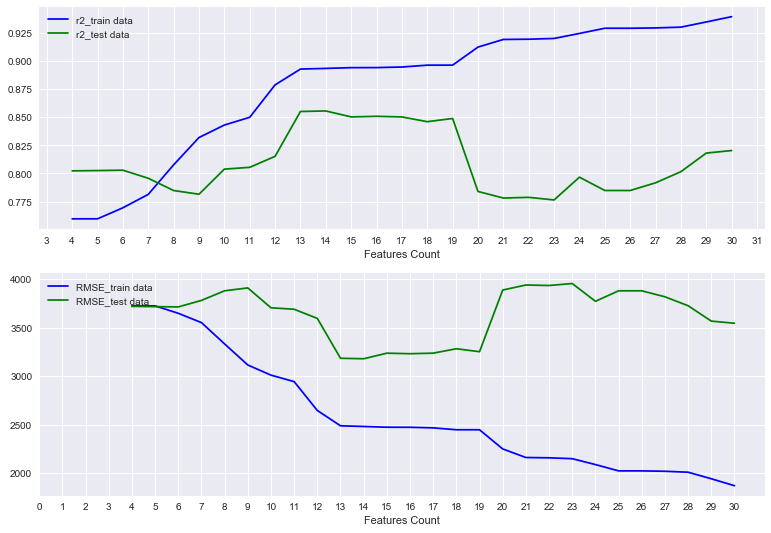

In [128]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))#method 2 of ticks

plt.show()

# Implementing model taking optimal features :

In [129]:
lm=LinearRegression()
rfe=RFE(lm,13)
rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_] #obtaining fetaure names of 12 most imp 

#making new Df's with  12 most imp features as per RFE algorithm
X_train_13= X_train[col]
X_test_13 = X_test[col]


# add a constant to the model
X_train_13 = sm.add_constant(X_train_13,has_constant='add')
X_test_13 = sm.add_constant(X_test_13,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,X_train_13).fit()


#making predictions
y_pred_train=lm_sm.predict(X_train_13)
y_pred_test=lm_sm.predict(X_test_13)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())

----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.8544713810877997
R-sq for train data is 0.8929436265404583
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 3184.5401609019086
RMSE for train data is 2486.664886736084
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     90.36
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           5.83e-57
Time:                        19:45:58   Log-Likelihood:                -1321.0
No. Observations:                 143   AIC:                             2668.
Df Residuals:                     130   BIC:                             2706.
Df Model:                          12       

AttributeError: module 'seaborn' has no attribute 'lineplot'

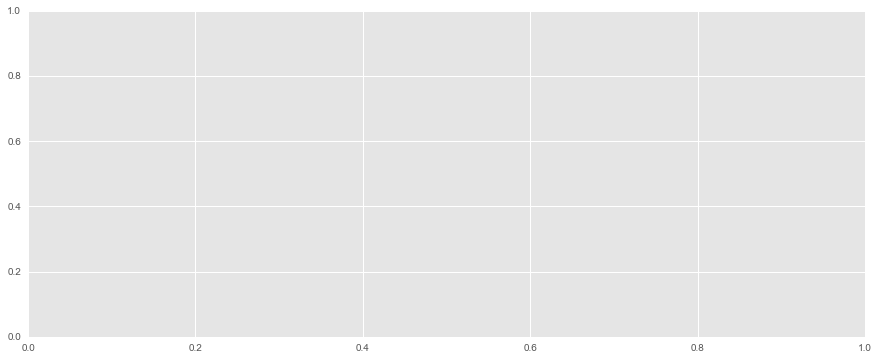

In [130]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

In [131]:
#select important features:
features_13=lm_sm.params.index
features_13=features_13[1:] 
features_13

Index(['width', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'peak_rpm', 'engine_type_dohcv', 'engine_type_ohc', 'engine_type_ohcv',
       'engine_type_rotor', 'num_of_cylinders_twelve', 'num_of_cylinders_two',
       'fuel_system_idi'],
      dtype='object')

In [132]:
X_train[features_13].head(5)

,width,engine_size,bore,stroke,compression_ratio,peak_rpm,engine_type_dohcv,engine_type_ohc,engine_type_ohcv,engine_type_rotor,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_idi
122,-0.984972,-0.695874,-0.154397,-0.142002,-0.187398,0.786333,-0.070014,0.620593,-0.260208,-0.141069,-0.070014,-0.141069,-0.328798
125,1.117866,0.579974,-0.118442,-0.146450,-0.162161,0.786333,-0.070014,0.620593,-0.260208,-0.141069,-0.070014,-0.141069,-0.328798
166,-0.891512,-0.695874,-0.144389,-0.147562,-0.187398,3.098048,-0.070014,-1.611363,-0.260208,-0.141069,-0.070014,-0.141069,-0.328798
1,-0.844782,0.074449,-0.135863,-0.162388,-0.288349,-0.264446,-0.070014,-1.611363,-0.260208,-0.141069,-0.070014,-0.141069,-0.328798
199,0.603839,0.074449,-0.130303,-0.144967,-0.666913,-0.054290,-0.070014,0.620593,-0.260208,-0.141069,-0.070014,-0.141069,-0.328798


# Validating if the linear reg assumption holds true or not:

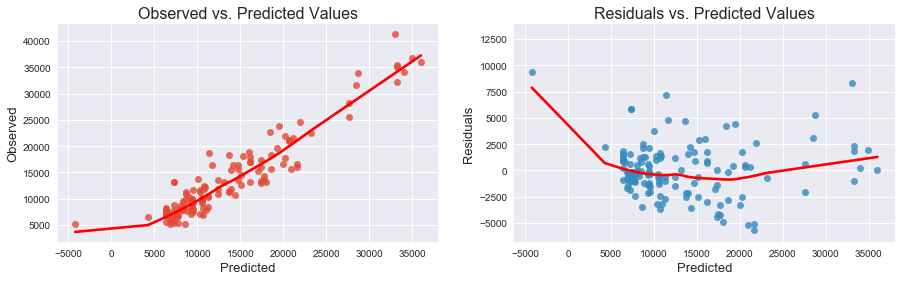

In [133]:
def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y_train)

# Equal variance of rest:

In [135]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

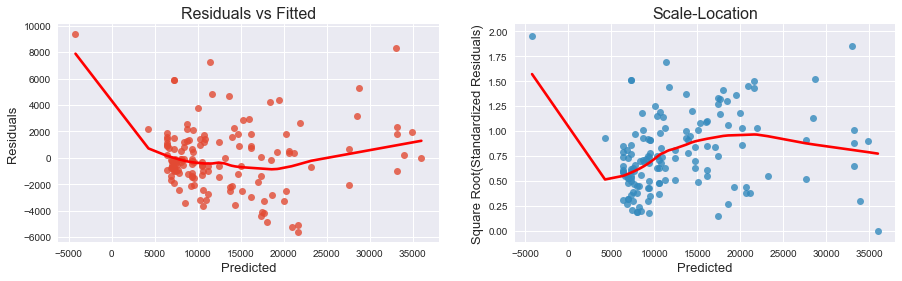

In [136]:
homoscedasticity_test(lm_sm)

# Normality of the rst:

Jarque-Bera test ---- statistic: 32.6486, p-value: 8.136585138984742e-08
Shapiro-Wilk test ---- statistic: 0.9573, p-value: 0.0002
Kolmogorov-Smirnov test ---- statistic: 0.5664, p-value: 0.0000
Anderson-Darling test ---- statistic: 1.5546, 5% critical value: 0.7660
If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


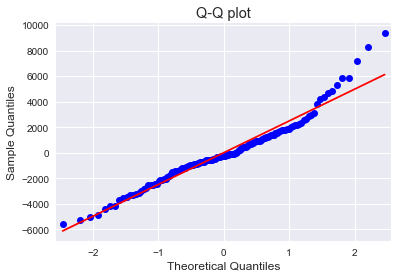

In [137]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');
    

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lm_sm)

# Outlier identification :

In [138]:

#Function to plot standardized residuals vs Leverage and cook's distance for outlier detection

def influential_outlier_test(model,top_influencing_obs_count):
    
    influence = model.get_influence()

#leverage (hat values)
    leverage = influence.hat_matrix_diag

#When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), 
#the cases are influential to the regression results. The regression results will be altered if we exclude those cases.
    cooks_d = influence.cooks_distance

#standardized residuals= (Residual/STD of Residuals)
    standardized_residuals = influence.resid_studentized_internal

#studentized residuals
    studentized_residuals = influence.resid_studentized_external 
    
    
    plot_lm = plt.figure(figsize=(15,5))
    plt.scatter(leverage, standardized_residuals, alpha=0.5)
    sns.regplot(leverage, standardized_residuals,scatter=False,ci=False,lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm.axes[0].set_xlim(0, max(leverage)+0.01)
    plot_lm.axes[0].set_ylim(-10, 6)
    plot_lm.axes[0].set_title('Standardized Residuals vs Leverage',fontsize=16)
    plot_lm.axes[0].set_xlabel('Leverage',fontsize=13)
    plot_lm.axes[0].set_ylabel('Standardized Residuals',fontsize=13);

    # annotations- #annotating index position of the top n cook's D points 
    
    leverage_top_n_obs = np.flip(np.argsort(cooks_d[0]), 0)[:top_influencing_obs_count]  
    
    for i in leverage_top_n_obs:
        plot_lm.axes[0].annotate(i,xy=(leverage[i],studentized_residuals[i])) 
    
    
# shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(lm_sm.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(leverage), 50),'Cook\'s distance')#cookd= 0.5 line
    plt.legend(loc='upper right');

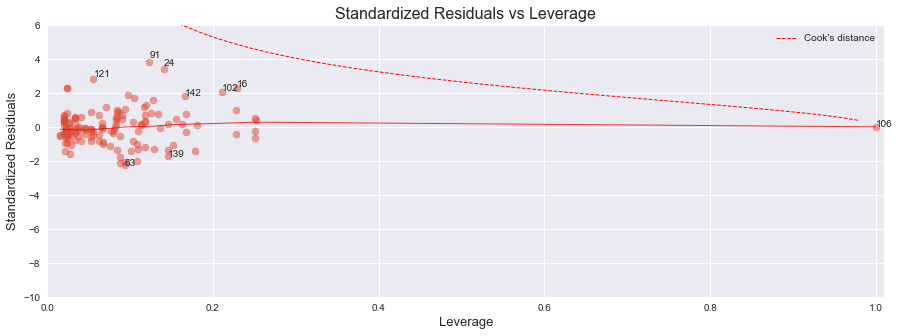

In [139]:
influential_outlier_test(model=lm_sm,top_influencing_obs_count=10)

# Removing Outlier:

In [140]:
X_train_no_outliers=X_train.drop(index=[16,24,91])
y_train_no_outliers=y_train.drop(index=[16,24,91])

In [141]:
X_train_no_outliers.head(5)

,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
122,-0.459135,-0.841772,-0.548402,-0.984972,-1.199923,-0.701886,-0.695874,-0.154397,-0.142002,-0.187398,...,-0.070014,-0.070014,-0.141069,1.451227,-0.121867,-0.328798,-0.070014,-0.920243,-0.214286,-0.070014
125,-0.418669,-0.708596,-0.418396,1.117866,-1.446071,0.428245,0.579974,-0.118442,-0.146450,-0.162161,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
166,-0.441431,-0.708596,-0.434647,-0.891512,-0.461478,-0.492032,-0.695874,-0.144389,-0.147562,-0.187398,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,1.998402,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.135863,-0.162388,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
199,-0.560299,0.922815,1.198549,0.603839,1.548733,1.157921,0.074449,-0.130303,-0.144967,-0.666913,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014


# Updating model after removing outliers: Implementing RFE & K fold[because the dataset is small]

In [142]:
#Selecting Features for RFE:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)  # specifying number of features

    # fit with n features
    rfe_n.fit(X_train_no_outliers, y_train_no_outliers)

    # selecting the features provided by rfe_n
    col_n = X_train_no_outliers.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # subsetting training & test data for n selected columns
    X_train_rfe_n = X_train_no_outliers[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n,has_constant='add')


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train_no_outliers, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train_no_outliers
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

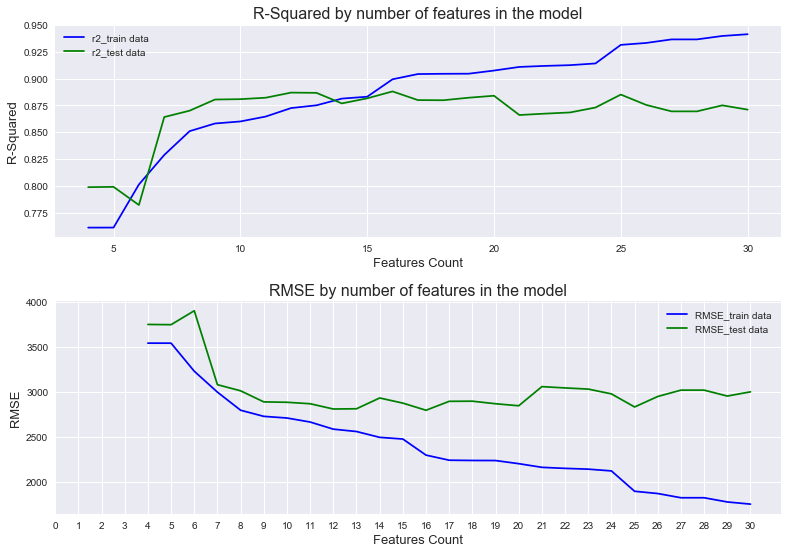

In [143]:
# plotting r2 and RMSE against n_features
fig,ax=plt.subplots(2,1,figsize=(13, 9))
plt.subplots_adjust(hspace = 0.3)
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count',fontsize=13)
ax[0].set_ylabel('R-Squared',fontsize=13)
ax[0].set_title('R-Squared by number of features in the model',fontsize=16)


ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count',fontsize=13)
ax[1].set_ylabel('RMSE',fontsize=13)
ax[1].set_title('RMSE by number of features in the model',fontsize=16)

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper right')
plt.xticks(np.arange(0,31,1))

plt.show()

In [144]:
#K Fold:

#removing the outliers 

X_new_cv = dfX_scaled.drop(index=[16,24,91]) # DF for K fold cross validation (cv)
y_new_cv = y.drop(index=[16,24,91])

In [145]:
X_new_cv.reset_index(inplace=True, drop=True)
X_new_cv.head(5)

,normalized_losses,Wheel_Base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,1.998402,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.135863,-0.162388,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
1,1.998402,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.135863,-0.162388,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
2,1.998402,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-0.165146,-0.133106,-0.288349,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
3,-0.446489,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.146242,-0.135701,-0.035973,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
4,-0.446489,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.146242,-0.135701,-0.540725,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014


In [146]:
y_new_cv.reset_index(drop=True,inplace=True)
y_new_cv.head(5)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# K fold cross validation:[Taking 5 folds]

In [148]:
from sklearn.model_selection import KFold


K=5 
kf = KFold(n_splits=K, shuffle=True, random_state=42)
   
for n_features in range(5,31):
    
    train_RMSE = []
    test_RMSE = []
    train_r2=[]
    test_r2=[]
    
    for train, test in kf.split(X_new_cv):
        
        lm = LinearRegression()
        
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
        
        rfe_n.fit(X_new_cv.loc[train],y_new_cv[train])
        
        y_pred_train=rfe_n.predict(X_new_cv.loc[train])
        y_pred_test=rfe_n.predict(X_new_cv.loc[test])
        
        #R-square
        train_r2.append(r2_score(y_pred_train , y_new_cv[train]))
        test_r2.append(r2_score(y_pred_test , y_new_cv[test]))
        
        #Error
        error_train = y_pred_train - y_new_cv[train]
        error_test = y_pred_test - y_new_cv[test]
        rmse_train=((error_train**2).mean())**0.5
        rmse_test=((error_test**2).mean())**0.5
        
        train_RMSE.append(rmse_train)
        test_RMSE.append(rmse_test)
        
    test_times_train=np.mean(test_RMSE)/np.mean(train_RMSE)
         # generate report
    print('n_features:{:1} |train_R2:{:2} |test_R2:{:3} |mean(rmse_train):{:4} |mean(rmse_test):{:5} |RMSE(test/train):{}'.
          format(n_features, round(np.mean(train_r2),4), round(np.mean(test_r2),4),
                 round(np.mean(train_RMSE),0),
                 round(np.mean(test_RMSE),0),round(test_times_train,2)))


n_features:5 |train_R2:0.273 |test_R2:0.5807 |mean(rmse_train):4138.0 |mean(rmse_test):37876.0 |RMSE(test/train):9.15
n_features:6 |train_R2:0.753 |test_R2:0.5901 |mean(rmse_train):3381.0 |mean(rmse_test):7449.0 |RMSE(test/train):2.2
n_features:7 |train_R2:0.8007 |test_R2:0.6218 |mean(rmse_train):3095.0 |mean(rmse_test):10928.0 |RMSE(test/train):3.53
n_features:8 |train_R2:0.8304 |test_R2:0.6178 |mean(rmse_train):2895.0 |mean(rmse_test):11870.0 |RMSE(test/train):4.1
n_features:9 |train_R2:0.8462 |test_R2:0.6208 |mean(rmse_train):2772.0 |mean(rmse_test):13589.0 |RMSE(test/train):4.9
n_features:10 |train_R2:0.8511 |test_R2:0.6225 |mean(rmse_train):2733.0 |mean(rmse_test):13723.0 |RMSE(test/train):5.02
n_features:11 |train_R2:0.8642 |test_R2:0.6108 |mean(rmse_train):2621.0 |mean(rmse_test):13827.0 |RMSE(test/train):5.28
n_features:12 |train_R2:0.8781 |test_R2:0.6165 |mean(rmse_train):2497.0 |mean(rmse_test):16186.0 |RMSE(test/train):6.48
n_features:13 |train_R2:0.8823 |test_R2:0.6259 |mea

In [149]:
#Final model with best 6 features:
import statsmodels.api as sm

lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=6)

rfe.fit(X_new_cv, y_new_cv)

col= X_new_cv.columns[rfe.support_] 

X_final=X_new_cv[col] #X DF wuith top 6 features only

X_final= sm.add_constant(X_final,has_constant='add')

lm_sm=sm.OLS(y_new_cv,X_final).fit()

print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           2.43e-75
Time:                        20:13:40   Log-Likelihood:                -1908.8
No. Observations:                 202   AIC:                             3830.
Df Residuals:                     196   BIC:                             3849.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.312e+04 

In [150]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(X_df): #X_df = X_train normally, in this model X=X_final
    '''
     '''
    X_df = add_constant(X_df)
    vifs = pd.Series(
        [1 / (1. - OLS(X_df[col].values, 
                       X_df.loc[:, X_df.columns != col].values).fit().rsquared) 
         for col in X_df],
        index=X_df.columns,
        name='VIF'
    )
    return vifs

In [151]:
variance_inflation_factors(X_final)

const                      1.000131
curb_weight                3.993245
engine_size                4.412301
stroke                  8084.003370
Engine_Location_rear       1.149515
engine_type_rotor               inf
num_of_cylinders_two            inf
Name: VIF, dtype: float64

In [153]:
X_final =X_final.loc[:,X_final.columns !='curbweight']
X_final.head(5)

,const,curb_weight,engine_size,stroke,Engine_Location_rear,engine_type_rotor,num_of_cylinders_two
0,1.0,-0.014566,0.074449,-0.162388,-0.121867,-0.141069,-0.141069
1,1.0,-0.014566,0.074449,-0.162388,-0.121867,-0.141069,-0.141069
2,1.0,0.514882,0.604046,-0.133106,-0.121867,-0.141069,-0.141069
3,1.0,-0.420797,-0.431076,-0.135701,-0.121867,-0.141069,-0.141069
4,1.0,0.516807,0.218885,-0.135701,-0.121867,-0.141069,-0.141069


In [155]:
lm_sm=sm.OLS(y_new_cv,X_final).fit()

y_predictions=lm_sm.predict(X_final)


#Standard error/RMSE
error=y_predictions-y_new_cv

print('RMSE is: {}'.format(((error**2).mean())**0.5))

print(lm_sm.summary())

RMSE is: 3073.001442072051
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           2.43e-75
Time:                        20:19:57   Log-Likelihood:                -1908.8
No. Observations:                 202   AIC:                             3830.
Df Residuals:                     196   BIC:                             3849.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const

AttributeError: module 'seaborn' has no attribute 'lineplot'

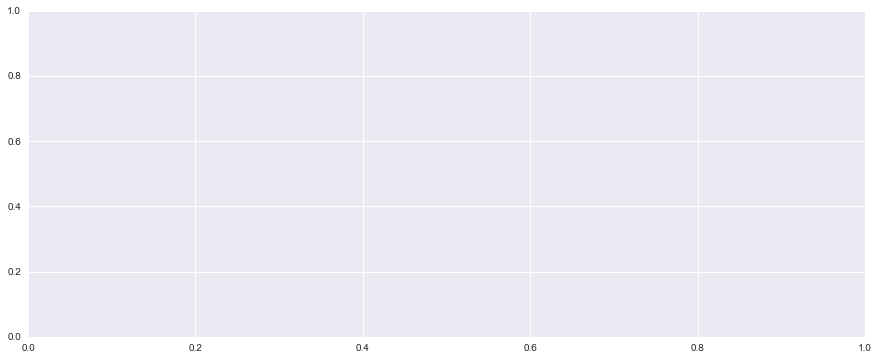

In [156]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_new_cv.index,y=y_new_cv,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_new_cv.index,y=y_predictions,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Car Price',fontsize=13)

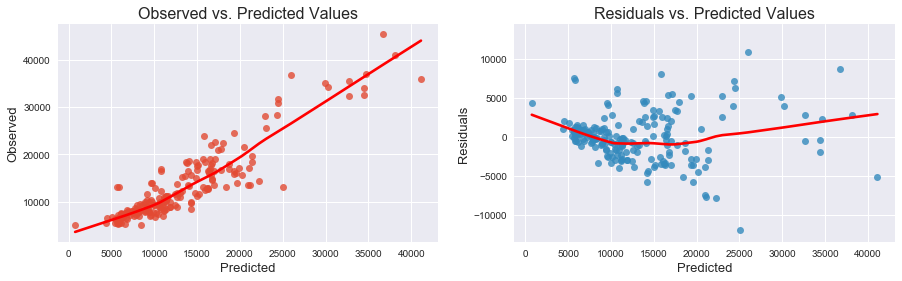

In [157]:
#Linearity test for final model:
linearity_test(lm_sm,y_new_cv)

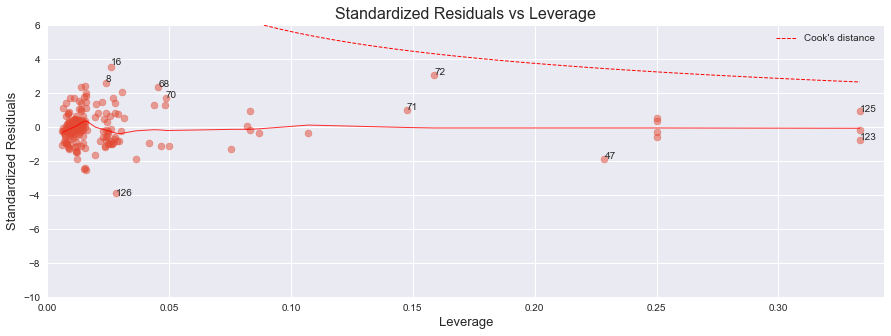

In [158]:
#Outlier test:
influential_outlier_test(model=lm_sm,top_influencing_obs_count=10)